# Import dependencies and determine working directory

In [1]:
# Import libraries
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import NLP dictionaries
import nltk
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# get current directory
dir = os.path.dirname(os.path.abspath('__file__'))

# Load review data

In [3]:
# Load review data 
# Raw data in the format of {} {} {} seperated by lines

# get file path (generalize for different OS) for reviews
filename_review = os.path.join(dir, '01_raw_data','review.json')

# create a list of reviews
with open(filename_review, encoding="utf8", mode='r') as file:
    reviews = [json.loads(line) for line in file]

# create a pandas data frame from review data 
reviews_df = pd.DataFrame(reviews)

# Load business data

In [4]:
# Load business data 

# get file path (generalize for different OS) for reviews
filename_business = os.path.join(dir, '01_raw_data','business.json')

# create a list of reviews
with open(filename_business, encoding="utf8", mode='r') as file:
    businesses = [json.loads(line) for line in file]

# create a pandas data frame from review data 
businesses_df = pd.DataFrame(businesses)

# Explore review data

In [5]:
# review data exploration 
print(reviews_df.shape )
print(reviews_df.info() )
print(reviews_df.describe() )

# check for null values
print( reviews_df.isnull().sum().sum() )

(4736897, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736897 entries, 0 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 325.3+ MB
None
               cool         funny         stars        useful
count  4.736897e+06  4.736897e+06  4.736897e+06  4.736897e+06
mean   5.096600e-01  4.029171e-01  3.724048e+00  9.882921e-01
std    1.960374e+00  1.721954e+00  1.421104e+00  2.600021e+00
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  4.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  5.000000e+00  1.000000e+00
max    5.130000e+02  6.310000e+02  5.000000e+00  1.125000e+03
0


In [6]:
# check output of first 50 
print(reviews_df.head(50) )

# outcome: some reviews look like accommodation and other non-restaurant business (e.g. first 15) 
# and some reviews are in a different language (e.g. index 4 and 5) and 

               business_id  cool        date  funny               review_id  \
0   uYHaNptLzDLoV_JZ_MuzUA     0  2016-07-12      0  VfBHSwC5Vz_pbFluy07i9Q   
1   uYHaNptLzDLoV_JZ_MuzUA     0  2016-10-02      0  3zRpneRKDsOPq92tq7ybAA   
2   uYHaNptLzDLoV_JZ_MuzUA     0  2015-09-17      0  ne5WhI1jUFOcRn-b-gAzHA   
3   uYHaNptLzDLoV_JZ_MuzUA     0  2016-08-21      0  llmdwOgDReucVoWEry61Lw   
4   uYHaNptLzDLoV_JZ_MuzUA     0  2013-11-20      0  DuffS87NaSMDmIfluvT83g   
5   uYHaNptLzDLoV_JZ_MuzUA     0  2016-06-05      0  GvLmUkjUrOyFH8KFnmT1uw   
6   uYHaNptLzDLoV_JZ_MuzUA     0  2015-02-21      0  lGEl24NGj2HVBJrodeXcjg   
7   uYHaNptLzDLoV_JZ_MuzUA     0  2013-07-07      0  cUgvEy5wj7zYE68v1BzzVg   
8   uYHaNptLzDLoV_JZ_MuzUA     2  2013-04-27      0  FSB_BnvysBgH3JYrbFNcgw   
9   uYHaNptLzDLoV_JZ_MuzUA     0  2015-04-13      0  dhl3ZW9aAEX_T7_um5tfaQ   
10  uYHaNptLzDLoV_JZ_MuzUA     1  2016-11-08      1  JQJvnM3p-3eML05eKcTgiw   
11  uYHaNptLzDLoV_JZ_MuzUA     0  2015-07-27      0 

# Explore business data

In [7]:
# business data exploration 
print(businesses_df.shape )
print(businesses_df.info() )
print(businesses_df.describe() )

# check for null values
print( businesses_df.isnull().sum().sum() )
# outcome: 2 null values - one in lat, the other in long 

# check output
print(businesses_df.head() )

(156639, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB
None
             is_open       latitude      longitude   review_count  \
count  156639.000000  156638.000000  156638.000000  156639.000000   
mean        0.844375      38.585033     -92.856485      30.238159   
std         0.

In [8]:
# Check if the businesses are located in the USA 

# Check if all the states are in the USA
print( businesses_df['state'].unique() )

# Check the lat long of the locations 
print(businesses_df['latitude'].describe() )
print(businesses_df['longitude'].describe() )

# Outcome: there appears to be non US states as well as lat long
# bounding box for the US is (49.3457868 # north lat) (24.7433195 # south lat) (-124.7844079 # west long) (-66.9513812 # east long)
# source: http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost

['OH' 'NC' 'ON' 'AZ' 'PA' 'NV' 'EDH' 'QC' 'WI' 'IL' 'BW' 'HLD' 'SC' 'ESX'
 'MLN' 'FIF' 'NYK' 'NI' 'ELN' 'WLN' '01' 'C' 'NY' 'SCB' 'AL' 'BY' 'RCC'
 'ST' 'NTH' 'NLK' '75' 'PKN' 'HH' 'TAM' 'CA' 'KHL' 'VT' 'ABE' 'SL' 'DE'
 'GLG' 'STG' 'ZET' 'XGL' 'WA' 'FLN' 'WHT' 'NE' 'FAL' '3' 'FL']
count    156638.000000
mean         38.585033
std           5.399871
min         -36.086009
25%          33.627161
50%          36.142381
75%          43.596845
max          89.999314
Name: latitude, dtype: float64
count    156638.000000
mean        -92.856485
std          26.557741
min        -142.466650
25%        -112.138207
50%         -89.523198
75%         -79.668760
max         115.086769
Name: longitude, dtype: float64


# Clean review data

In [9]:
# convert date to a datetime - note stars will be kept as an integer vs category
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')

# Clean business data 

In [10]:
# Extract restaurants 
restaurants_df = businesses_df[ businesses_df['categories'].apply(lambda categories: any(pd.Series(categories).str.contains('Restaurants')) if len(categories)>0 else False)]
print( restaurants_df.shape )

(51613, 15)


In [11]:
# Restrict restaurants to the USA using a bounding box 
restaurants_df = restaurants_df[ (restaurants_df['latitude'] >= 24.7433195) & (restaurants_df['latitude'] <= 49.3457868) & (restaurants_df['longitude'] >= -124.7844079) & (restaurants_df['longitude'] <= -66.9513812)]

In [12]:
# Check if the businesses are located in the USA 

# Check if all the states are in the USA
print( restaurants_df['state'].unique() )

# Check the lat long of the locations 
print(restaurants_df['latitude'].describe() )
print(restaurants_df['longitude'].describe() )

# Check to see if a significant proportion of the data set was dropped 
print( restaurants_df.shape )

# outcome: states now limited to those in the USA and lat longs in the expected range of values - 51 613 to 48 172 observations

['NC' 'AZ' 'PA' 'ON' 'WI' 'QC' 'IL' 'NV' 'OH' 'SC' 'NY' 'WA']
count    48172.000000
mean        39.444061
std          4.434200
min         33.137277
25%         35.212550
50%         40.464975
75%         43.664307
max         48.343443
Name: latitude, dtype: float64
count    48172.000000
mean       -91.667579
std         16.300928
min       -119.551325
25%       -111.975926
50%        -80.979222
75%        -79.419779
max        -70.879166
Name: longitude, dtype: float64
(48172, 15)


In [13]:
# drop columns - address, city, hours, is_open, neighborhood, postal_code, state, latitude, longitude
dropped_columns = ['address','city','hours', 'is_open','neighborhood','postal_code', 'state', 'latitude', 'longitude']
for column in dropped_columns:
    del restaurants_df[column]

# Merge review data with restaurant's data 

In [14]:
# Merge both data frames
joint_df = pd.merge(reviews_df, restaurants_df, on='business_id', suffixes=['_review', '_business'])

# Explore merged data set

In [15]:
print( joint_df.shape )
print( joint_df.info() )

# outcome: no missing values
# Inner join reduced the total number of reviews from 4 736 897 to the 2 927 731 from restaurants to the 2 876 509 from restaurants in the USA bounding box 

(2876509, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876509 entries, 0 to 2876508
Data columns (total 14 columns):
business_id       object
cool              int64
date              datetime64[ns]
funny             int64
review_id         object
stars_review      int64
text              object
useful            int64
user_id           object
attributes        object
categories        object
name              object
review_count      int64
stars_business    float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 329.2+ MB
None


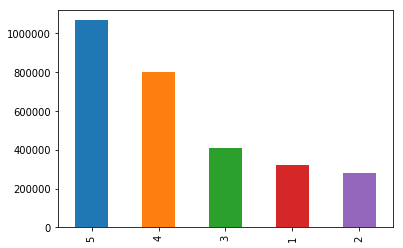

In [16]:
# bar char of review stars 
review_stars = joint_df['stars_review'].value_counts()
review_stars.plot(kind='bar')
plt.show()

# Pre-process review text

## Get stop words and lemmatizing function

In [17]:
# Get stop words 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

# Include puncutation into stop words 
stop_words_punc = stopWords.union(string.punctuation )

# Get lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# import tokenizer
from nltk.tokenize import wordpunct_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chriskhoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chriskhoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Define a function that cleans a single review

In [18]:
# references: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words 
# https://radimrehurek.com/data_science_python/
# http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
# https://stackoverflow.com/questions/19130512/stopword-removal-with-nltk
# https://stackoverflow.com/questions/46203023/how-can-i-make-my-python-nltk-pre-processing-code-more-efficient

def pre_process_review( review_text ):
    # Convert all text to lower case, tokenize into list of strings, remove punctuation and stop words, and lemmatize
    return [lemmatizer.lemmatize(word) for word in wordpunct_tokenize(review_text.lower()) if not word in stop_words_punc]

# Test pre_process_review function 
print( pre_process_review("Hey you! Test this sample review, with this: and this ...; and other punctuations and UPPER case letters! And walk, walking, walks, cats and cacti for lemmatizing.") )

['hey', 'test', 'sample', 'review', '...;', 'punctuation', 'upper', 'case', 'letter', 'walk', 'walking', 'walk', 'cat', 'cactus', 'lemmatizing']



## Apply pre-processing to all review text

In [19]:
# Apply pre processing to review text and store result in a new column
joint_df['processed_review'] = joint_df['text'].apply(lambda review_text: pre_process_review( review_text ))

# Check output
joint_df['processed_review'].head(20)

0     [place, horrible, excited, try, since, got, gi...
1     [fairly, fast, food, .., pei, wei, pronounced,...
2     [decided, try, celiac, therefore, eat, gluten,...
3     [saying, pei, wei, best, asian, food, ever, ta...
4     [sometimes, food, spot, delicious, time, quite...
5     [decent, customer, service, food, awful, cold,...
6     [super, clean, restaurant, friendly, staff, fr...
7     [found, night, pf, chang, fast, food, option, ...
8     [staff, great, nice, wonderful, quick, people,...
9     [garlic, ginger, broccoli, chicken, good, broc...
10    [review, based, upon, consistency, flavor, gre...
11    [love, place, recommend, anyone, always, order...
12    [1st, place, closed, issue, legal, worker, fra...
13    [definitely, fan, coming, orange, county, ca, ...
14    [pretty, good, great, definitely, overpriced, ...
15    [wish, could, give, 1, 5, star, nothing, speci...
16    [disappointed, yelp, hour, show, open, 1030am,...
17    [1st, visit, lo, mein, ..., delish, 2nd, v

In [20]:
print(joint_df.head(20))

               business_id  cool       date  funny               review_id  \
0   jQsNFOzDpxPmOurSWCg1vQ     0 2017-06-03      0  ByRzJ8rF2KJWLr-cUNU6EA   
1   jQsNFOzDpxPmOurSWCg1vQ     0 2015-03-26      0  i5UwUPlQFPLcE8p2gPFwBw   
2   jQsNFOzDpxPmOurSWCg1vQ     1 2012-12-30      1  EyQyvTTg2jX4or9bB8PC9g   
3   jQsNFOzDpxPmOurSWCg1vQ     1 2009-01-12      1  G-EFA005besj5uHsH0sQFA   
4   jQsNFOzDpxPmOurSWCg1vQ     0 2015-07-11      0  6PcJSGUBSLjt4VLXos5C4A   
5   jQsNFOzDpxPmOurSWCg1vQ     0 2015-05-27      0  PFJmyZD_lNBa_Y3kbX1VvA   
6   jQsNFOzDpxPmOurSWCg1vQ     1 2015-02-28      1  _Qv1FQUToLrKMuG6pV4Gzw   
7   jQsNFOzDpxPmOurSWCg1vQ     0 2010-04-05      0  s2mlqrFNaPEGtcnEu3EJ4Q   
8   jQsNFOzDpxPmOurSWCg1vQ     0 2015-05-22      0  oiSzZRrbi3y01_wqU528ZQ   
9   jQsNFOzDpxPmOurSWCg1vQ     0 2011-06-15      0  4BPjRE9VI0HhyZzyyYv0BQ   
10  jQsNFOzDpxPmOurSWCg1vQ     0 2017-03-12      0  kznHtw1Qido_9GX6sDQPJw   
11  jQsNFOzDpxPmOurSWCg1vQ     1 2016-12-19      0  HWRTVn3Lc-Rw

# Drop excess columns

In [30]:
# drop columns after merge and pre-processing
# note: the text column has an observation that does not store and load well and will need to be found and removed if text column is to be included.
dropped_columns = ['business_id', 'review_id', 'text', 'name']
for column in dropped_columns:
    del joint_df[column]

In [31]:
print(joint_df.shape )

(2876509, 11)


# Save output of data wrangling 

## Save merged data of reviews and restaurants in the USA 

In [32]:
# Save df into a csv (approx 5 mins, 4.48 GB)
filename_out = os.path.join(dir, '02_processed_data','restaurant_reviews.csv')
joint_df.to_csv(filename_out, index=False )

## Verify CSV

In [38]:
# Load df from a csv (approx 5 mins)
file_path = os.path.join(dir, '02_processed_data','restaurant_reviews.csv')
joint_df2 = pd.read_csv(file_path, index_col = False, parse_dates= ['date'])

In [40]:
# run checks to see the data frames are similar
print( 'Saved df shape:', str(joint_df.shape) )
print( 'Loaded df shape:', str(joint_df2.shape) )
print( '-------------')
print( 'Saved df info:')
print( joint_df.info() )
print( '-------------')
print( 'Loaded df info:')
print( joint_df2.info() )

Saved df shape: (2876509, 11)
Loaded df shape: (2876509, 11)
-------------
Saved df info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876509 entries, 0 to 2876508
Data columns (total 11 columns):
cool                int64
date                datetime64[ns]
funny               int64
stars_review        int64
useful              int64
user_id             object
attributes          object
categories          object
review_count        int64
stars_business      float64
processed_review    object
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 263.4+ MB
None
-------------
Loaded df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876509 entries, 0 to 2876508
Data columns (total 11 columns):
cool                int64
date                datetime64[ns]
funny               int64
stars_review        int64
useful              int64
user_id             object
attributes          object
categories          object
review_count        int64
stars_business     

# Vectorize pre-processed text

## Define vectorizer

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import NLP dictionaries
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# get current directory
dir = os.path.dirname(os.path.abspath('__file__'))

In [38]:
# Load df from a csv (approx 5 mins)
file_path = os.path.join(dir, '02_processed_data','restaurant_reviews.csv')
joint_df = pd.read_csv(file_path, index_col = False, parse_dates= ['date'])

In [21]:
# Initialize scikit-learn's bag of words tool -  "CountVectorizer"
# Source: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
n_features = 3000
vectorizer = CountVectorizer(analyzer = 'word',
                             max_features = n_features,
                             max_df=0.95, 
                             min_df=2).fit(" ".join(line) for line in joint_df['processed_review'])
print (len(vectorizer.vocabulary_))

3000


## Vectorize text

In [22]:
# Vectorize text and convert the result to an Numpy array
vectorized_text = vectorizer.transform(" ".join(line) for line in joint_df['processed_review'])
vectorized_text_array = vectorized_text.toarray()

## Explore word vector properties and most common words

In [23]:
# Get list of words in the vocabulary
vocab = vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(vectorized_text_array, axis=0)

# Explore vector metrics
print ('sparse matrix shape:', vectorized_text.shape)
print ('number of non-zeros:', vectorized_text.nnz)
print ('sparsity: %.2f%%' % (100.0 * vectorized_text.nnz / (vectorized_text.shape[0] * vectorized_text.shape[1])))

# Print most used words in reverse order
print( pd.Series( dict(list(zip(vocab, dist))) ).sort_values( ascending = False) )

sparse matrix shape: (2876509, 3000)
number of non-zeros: 119826809
sparsity: 1.39%
food            2293171
good            1892858
place           1889152
great           1344620
service         1180824
time            1178872
like            1131077
one             1004655
get              938087
back             863566
go               857214
really           827370
restaurant       826086
would            821958
ordered          700710
order            698338
also             658247
chicken          643743
menu             595335
got              580615
nice             557659
best             555557
come             543735
well             541939
came             533220
try              531427
delicious        526938
table            519562
even             514624
love             504504
                 ...   
deliciously        5203
sriracha           5203
macaroon           5199
politely           5199
remove             5197
americanized       5195
eager              5195
caro

# Explore the vector

In [24]:
# Sum up the word counts of each review
review_words = np.sum(vectorized_text_array, axis=1)
print(review_words)

[23 36 56 ..., 64 33 28]


Mean : 50.1913590397


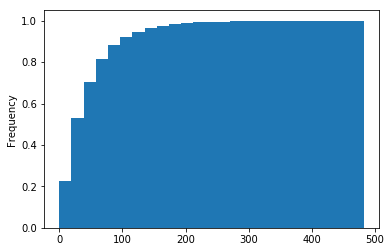

In [25]:
print( 'Mean :', np.mean(review_words) )
review_word_count = pd.Series(review_words)
review_word_count.plot(kind='hist', bins=25, normed=True, cumulative=True)
plt.show()

## Save vectorized text array

In [ ]:
# Save vectorized text into a npy
# https://stackoverflow.com/questions/28439701/how-to-save-and-load-numpy-array-data-properly
filename_out = os.path.join(dir, '02_processed_data','vectorized_reviews.npy')
np.save(filename_out, vectorized_text_array)    # .npy extension is added if not given

# note to load use vectorized_text_array = np.load(filename_out)